In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pids = list(range(100,107))
for pid in pids:
    if pid == 100:
        OldNew = pd.read_csv(f'../data/log/pid{pid}_tnt.csv', usecols=['TNT', 'colour', 'group', 'oldnew'])
    else:
        OldNew_temp = pd.read_csv(f'../data/log/pid{pid}_tnt.csv', usecols=['TNT', 'colour', 'group', 'oldnew'])
        OldNew = pd.concat([OldNew, OldNew_temp], ignore_index=True)
    OldNew['oldnew_true'] = OldNew['group'].map({1: 'OLD', 2: 'OLD', 4:'NEW'})
    OldNew['score'] = [int(i['oldnew']==i['oldnew_true']) for _, i in OldNew.iterrows()]
    #OldNew['group'].value_counts('score')


In [4]:
OldNew.value_counts('score')

score
1    722
0    286
Name: count, dtype: int64

In [6]:
OldNew.groupby(['group','score']).size()

group  score
1      0         25
       1        311
2      0         35
       1        301
4      0        226
       1        110
dtype: int64

In [11]:
print(OldNew.groupby(['group'])['score'].mean()*100)

group
1    92.559524
2    89.583333
4    32.738095
Name: score, dtype: float64


In [12]:
OldNew['score'].mean()

0.7162698412698413

In [48]:
OldNew.where(OldNew['oldnew']=='NOT').groupby('group').size()

group
1.0    13
2.0    25
4.0     5
dtype: int64

In [50]:
OldNew.where(OldNew['oldnew']=='NOT').dropna()

TNT colour  group oldnew oldnew_true  score
6     6.0    red    2.0    NOT         OLD    0.0
22    2.0    red    2.0    NOT         OLD    0.0
28    6.0    red    2.0    NOT         OLD    0.0
43    6.0    red    2.0    NOT         OLD    0.0
51    5.0  green    1.0    NOT         OLD    0.0
57    6.0    red    2.0    NOT         OLD    0.0
71    5.0  green    1.0    NOT         OLD    0.0
72    5.0  green    1.0    NOT         OLD    0.0
77    6.0    red    2.0    NOT         OLD    0.0
78    2.0    red    2.0    NOT         OLD    0.0
92    5.0  green    1.0    NOT         OLD    0.0
94    6.0    red    2.0    NOT         OLD    0.0
118   6.0    red    2.0    NOT         OLD    0.0
135   5.0  green    1.0    NOT         OLD    0.0
138  16.0    red    2.0    NOT         OLD    0.0
139   3.0    red    4.0    NOT         NEW    0.0
140   1.0  green    1.0    NOT         OLD    0.0
141  13.0    red    4.0    NOT         NEW    0.0
142   6.0    red    2.0    NOT         OLD    0.0
150   6.0    red    2.0    NOT         OLD    0.0
166   2.0    red    2.0    NOT         OLD    0.0
172   6.0    red    2.0    NOT         OLD    0.0
187   6.0    red    2.0    NOT         OLD    0.0
195   5.0  green    1.0    NOT         OLD    0.0
201   6.0    red    2.0    NOT         OLD    0.0
215   5.0  green    1.0    NOT         OLD    0.0
216   5.0  green    1.0    NOT         OLD    0.0
221   6.0    red    2.0    NOT         OLD    0.0
222   2.0    red    2.0    NOT         OLD    0.0
236   5.0  green    1.0    NOT         OLD    0.0
238   6.0    red    2.0    NOT         OLD    0.0
262   6.0    red    2.0    NOT         OLD    0.0
279   5.0  green    1.0    NOT         OLD    0.0
282  16.0    red    2.0    NOT         OLD    0.0
283   3.0    red    4.0    NOT         NEW    0.0
284   1.0  green    1.0    NOT         OLD    0.0
285  13.0    red    4.0    NOT         NEW    0.0
286   6.0    red    2.0    NOT         OLD    0.0
349  15.0  green    1.0    NOT         OLD    0.0
720  17.0    red    4.0    NOT         NEW    0.0
767   4.0    red    2.0    NOT         OLD    0.0
829   6.0    red    2.0    NOT         OLD    0.0
833  11.0    red    2.0    NOT         OLD    0.0

## Recognition percentage per participant

In [5]:
pids = list(range(100,107))
for pid in pids:
    OldNew = pd.read_csv(f'../data/log/pid{pid}_tnt.csv', usecols=['TNT', 'colour', 'group', 'oldnew'])
    OldNew['oldnew_true'] = OldNew['group'].map({1: 'OLD', 2: 'OLD', 4:'NEW'})
    OldNew['perceive_score'] = [int(i['oldnew']==i['oldnew_true']) for _, i in OldNew.iterrows()]
    perceive_score = OldNew.groupby(['group','TNT'])['perceive_score'].mean().reset_index()
    perceive_score.set_index('TNT', drop=True, inplace=True)
    class_score = OldNew.groupby(['group'])['perceive_score'].mean() * 100
    print(f"pid{pid} Recognition (%): {perceive_score['perceive_score'].mean() * 100:.2f}, 1: {class_score[1]:.2f}%, 2: {class_score[2]:.2f}%, 4: {class_score[4]:.2f}%")

pid100 Recognition (%): 71.53, 1: 79.17%, 2: 75.00%, 4: 60.42%
pid101 Recognition (%): 71.53, 1: 79.17%, 2: 75.00%, 4: 60.42%
pid102 Recognition (%): 77.08, 1: 97.92%, 2: 100.00%, 4: 33.33%
pid103 Recognition (%): 66.67, 1: 100.00%, 2: 100.00%, 4: 0.00%
pid104 Recognition (%): 69.44, 1: 100.00%, 2: 100.00%, 4: 8.33%
pid105 Recognition (%): 77.78, 1: 97.92%, 2: 79.17%, 4: 56.25%
pid106 Recognition (%): 67.36, 1: 93.75%, 2: 97.92%, 4: 10.42%


In [6]:
print(OldNew.groupby(['group'])['perceive_score'].mean()[1])

0.9375


In [7]:
perceive_score

group  perceive_score
TNT                       
1        1           1.000
5        1           0.750
7        1           1.000
9        1           0.875
14       1           1.000
15       1           1.000
2        2           1.000
4        2           0.875
6        2           1.000
11       2           1.000
12       2           1.000
16       2           1.000
0        4           0.250
3        4           0.250
8        4           0.125
10       4           0.000
13       4           0.000
17       4           0.000

compare to the recall score

In [8]:
def read_response(pid):
    answers = pd.read_excel('../data/shadow_materials_with_answers.xlsx', sheet_name='pid%s' % pid, header=None)
    # select first 9 cols
    answers = answers.loc[:, :9]
    # select A-X set
    answers = answers.iloc[1:25]

    answers.columns = ['TNT', 'group', 'stim1', 'stim2', 'cl1', 'cl2', 'cl3', 'cl4', 'scoreA', 'scoreB']
    answers.drop(['stim1', 'stim2', 'cl1', 'cl2', 'cl3', 'cl4', 'scoreB'], axis=1, inplace=True)
    answers['TNT'] = pd.to_numeric(answers['TNT']).astype('int')
    #answers.set_index('?', drop=True, inplace=True)
    #answers.columns = [f'group.{pid}',f'score.{pid}']
    return answers

In [46]:
answers100 = read_response(pid).set_index('TNT', drop=True)

In [52]:
answers100 = answers100.merge(perceive_score)

In [59]:
answers100

group scoreA  perceive_score
0       4      0           0.750
1       4      0           0.750
2       4      0           0.625
3       4      0           0.000
4       4      0           0.875
..    ...    ...             ...
103     2      1           1.000
104     2      1           0.000
105     2      1           1.000
106     2      1           1.000
107     2      1           0.875

[108 rows x 3 columns]

In [9]:
def read_recall_table(cue_type):
	answers = pd.read_excel('../data/shadow_materials_with_answers.xlsx', sheet_name='%recall', header=0)
	if cue_type=='tnt':
		answers = answers.iloc[22:50]
	elif cue_type=='ax':
		answers = answers.iloc[0:21]
	elif cue_type=='bx':
		answers = answers.iloc[51:75]
	answers = answers[['pid','group_num','group_name','%recall']]
	answers['pid'] = pd.to_numeric(answers['pid']).astype(int)
	answers['group_num'] = pd.to_numeric(answers['group_num']).astype(int)
	answers['%recall'] = pd.to_numeric(answers['%recall']).astype(float)
	return answers

In [32]:
def plot_sif(answers, plot_name: str, file_name: str):
    custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
    sns.set_style(style='ticks', rc=custom_params)
    plt.figure(figsize=(8,6))
    ax = sns.boxplot(data=answers, x='group_name', y='%recall', 
                 showcaps=True, 
                 palette='Blues', 
                 flierprops={'marker': 'x'}, 
                 showmeans=True,
                 meanprops={'marker': '+',
                            'markeredgecolor': 'black'},
                 )

    ax = sns.stripplot(data=answers, x='group_name', y='%recall', alpha=0.3, color='black')
    #ax.set_title("Supression-Induced Forgetting on TNT pairs")
    ax.set_title(plot_name, fontsize=20)
    ax.set_ylabel("Percent Correctly Recalled (%)", fontsize=16)
    ax.set_ylim(0,100)
    ax.set_xlabel("TNT group", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gcf()
    #plt.savefig('../img_disert/SIF_group.png')
    plt.savefig(f'../img_disert/{file_name}.png', dpi=96)
    plt.show()

In [33]:
answers = read_recall_table('tnt')

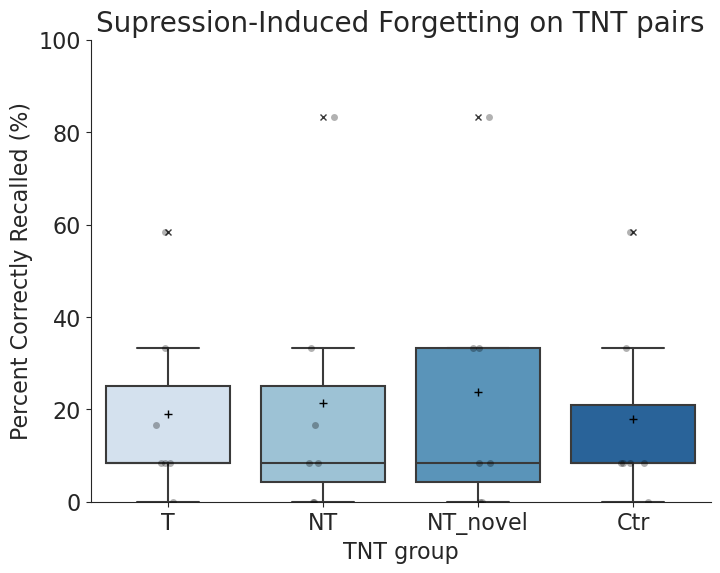

In [34]:
plot_sif(answers, "Supression-Induced Forgetting on TNT pairs", "SIF_group")

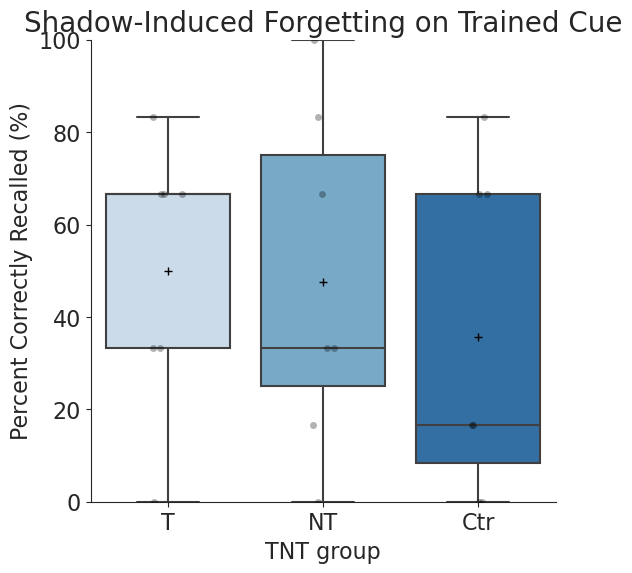

In [30]:
answers = read_recall_table('ax')
plot_sif(answers, "Shadow-Induced Forgetting on Trained Cue", "Shadow_trained")

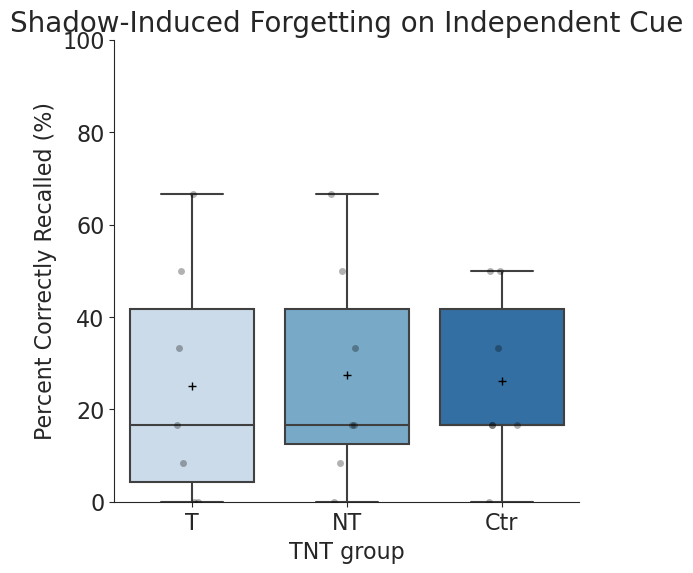

In [31]:
answers = read_recall_table('bx')
plot_sif(answers, "Shadow-Induced Forgetting on Independent Cue", "Shadow_independent")